##  解析UMI数据结构

In [24]:
import os
import sys
import zarr
from imagecodecs_numcodecs import register_codecs, JpegXl
# 临时重定向 stderr 来抑制注册信息
old_stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')

try:
    register_codecs()
finally:
    sys.stderr.close()
    sys.stderr = old_stderr
root = zarr.open('mv-umi-dataset/bottles_rack_data.zarr.zip')
print(root.tree())

# print(root['data']["camera0_rgb"])
# print(root['meta']['episode_ends'][:])

/
 ├── data
 │   ├── camera0_rgb (164614, 224, 224, 3) uint8
 │   ├── camera1_rgb (164614, 224, 224, 3) uint8
 │   ├── robot0_demo_end_pose (164614, 6) float64
 │   ├── robot0_demo_start_pose (164614, 6) float64
 │   ├── robot0_eef_pos (164614, 3) float32
 │   ├── robot0_eef_rot_axis_angle (164614, 3) float32
 │   └── robot0_gripper_width (164614, 1) float32
 └── meta
     └── episode_ends (199,) int64


In [27]:
print(root['data']['robot0_eef_pos'][0])
print(root['data']['robot0_eef_rot_axis_angle'][0])
print(root['data']['robot0_gripper_width'][0])

[ 0.10687682 -0.30225947  0.03170156]
[-2.8537254  -0.18204843  0.07643138]
[0.03628272]


In [ ]:
print(root['data']['robot0_demo_start_pose'][0])
# print(root['data']['robot0_demo_end_pose'][0])

[ 0.10687682 -0.30225947  0.03170156 -2.85372546 -0.18204843  0.07643138]
[ 1.10132365 -0.23896061  0.05442888 -1.97272154 -0.75483501  0.3512656 ]


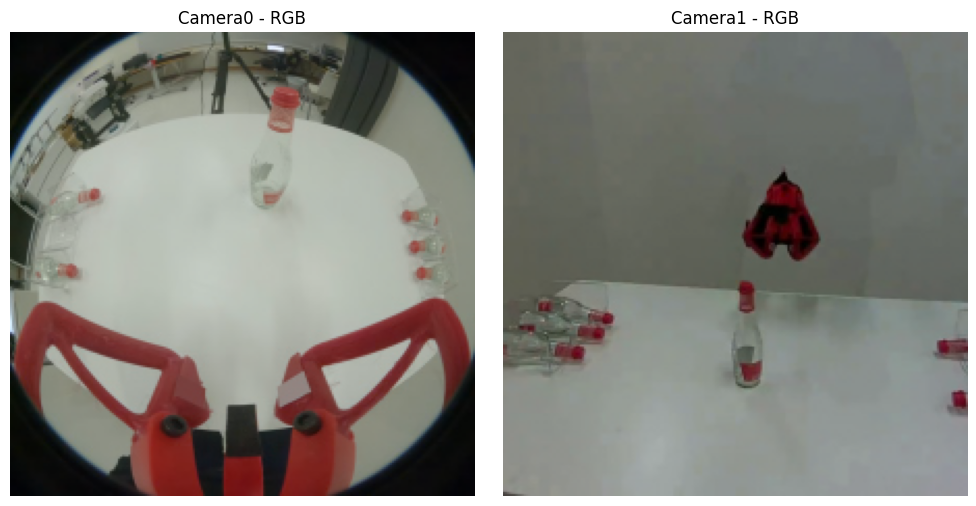

In [ ]:
# 正确颜色显示（BGR 转 RGB）
import matplotlib.pyplot as plt

step = 452
cam0 = root['data']['camera0_rgb'][step]
cam1 = root['data']['camera1_rgb'][step]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cam0)
axes[0].set_title('Camera0 - RGB')
axes[0].axis('off')
axes[1].imshow(cam1)
axes[1].set_title('Camera1 - RGB')
axes[1].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
print(root['data']['robot0_demo_end_pose'][0])
print(root['data']['robot0_demo_end_pose'][100])
print(root['data']['robot0_demo_end_pose'][500])

[ 1.10132365 -0.23896061  0.05442888 -1.97272154 -0.75483501  0.3512656 ]
[ 1.10132365 -0.23896061  0.05442888 -1.97272154 -0.75483501  0.3512656 ]
[-1.29849274 -0.48286522 -0.06471573 -2.03860109 -1.37828757  0.58272575]
